In [0]:
#import packages

import numpy as np
from sklearn import datasets
import torch
import matplotlib.pyplot as plt



In [0]:
# create a network

class net(torch.nn.Module):
  def  __init__(self,input_size, hi_size1, hi_size2, output_num):
    super(net,self).__init__()
    self.fc1=torch.nn.Linear(input_size,hi_size1)
    self.relu1=torch.nn.ReLU()
    self.fc2=torch.nn.Linear(hi_size1,hi_size2)
    self.relu2=torch.nn.ReLU()
    self.fc3=torch.nn.Linear(hi_size2,output_num)

    
    
  def forward(self,x):
    out=self.fc1(x)
    out=self.relu1(out)
    out=self.fc2(out)
    out=self.relu2(out)
    out=self.fc3(out)
    return out
  
 
    

In [3]:
model=net(4,100,50,3)
print(model)

#print parameters size
print("\nParameters size: ")
for param in model.parameters():
  print(param.shape)

net(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

Parameters size: 
torch.Size([100, 4])
torch.Size([100])
torch.Size([50, 100])
torch.Size([50])
torch.Size([3, 50])
torch.Size([3])


In [0]:
batch_size=60 # number of samples in one batch


criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)


In [0]:
#dataset 

iris = datasets.load_iris()
X = iris.data[:,:]  #  np.array (150,4)
y = iris.target     #  np.array (150,)

########################number of features is 3

y=y.reshape(-1,1)# np.array (120,)
Xy=np.concatenate((X,y),axis=1) #  [x,y]:  np.array (120,5)
np.random.shuffle(Xy) 


xtr=Xy[0:120,:4] #xtrain, np.array shape (120,4)
xts=Xy[120:,:4]  #xtest,  np.array shape (30,)
ytr=Xy[0:120,4]  #ytrain, np.array shape (120,)
yts=Xy[120:,4]   #ytest,  np.array shape (30,)

yts=yts.reshape(-1,1)  #ytrain, shape (30,1)
ytr=ytr.reshape(-1,1)  #ytest,  shape (120,1)

xyTrain=np.concatenate((xtr,ytr),axis=1)# [x,y] , shape=(120,5)
num_batches=np.ceil(xtr.shape[0]/batch_size) # number of batches


In [0]:
#creating batches

def shuffle_getBatch(xy):
  
  np.random.shuffle(xy)  #shuffling train data 
  shuffled_xtr=xy[:,:4]
  shuffled_ytr=xy[:,4]

  xbatches=np.split(shuffled_xtr[:int((num_batches-1)*batch_size),:],num_batches-1) # creating num_batches-1 batches with lenght batch_size  for X
  ybatches=np.split(shuffled_ytr[:int((num_batches-1)*batch_size)],num_batches-1)   # creating num_batches-1 batches with lenght batch_size  for y
  
  
  lastXbatch=xy[int((num_batches-1)*batch_size):,:4] # create the last batch for X 
  lastYbatch=xy[int((num_batches-1)*batch_size):,4]  # create the last batch for y 
  
  xbatches.append(lastXbatch)
  ybatches.append(lastYbatch)

  
  return xbatches,ybatches

In [0]:
# calculating accuracy

def cal_accuracy(pred_classes,real_classes):#  shape -> both : [number of test samples,1]  or both : [number of test samples,]
  bool_array=(pred_classes==real_classes) # example: bool_array=[True, False, True, False, True]
  True_pred_counts=np.count_nonzero(bool_array) # count number of Trues in [True, False, True, False, True]
  
  return True_pred_counts/pred_classes.shape[0]

In [0]:
# Train and test

num_epochs=500
testacc=[]
for i in range(num_epochs):
  xbatches,ybatches=shuffle_getBatch(xyTrain)
  
  for batchNumber,xbatch in enumerate(xbatches):

    X=torch.autograd.Variable(torch.FloatTensor(xbatch)) #xbatch: nparray (batchsize,4)  |  X: torch.Size([batchsize, 4])
    Y=torch.autograd.Variable(torch.LongTensor(ybatches[batchNumber]))  #ybatches[batchNumber]: nparray (batchsize,)  |  Y: torch.Size([batchsize])
    
    model.train() 
    outputs=model(X) #output: torch.Size([batchsize, 3]) | 3 is number of output neurons
    loss=criterion(outputs,Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    
    
  ##test at end of each epoch
  test_pred=model(torch.FloatTensor(xts)) # xts: np.array (number of test samples,4) | test_pred : torch.Size([number of test samples, 3])
  pred_classes=torch.max(test_pred.data, 1)[1]# pred_classes: torch.Size([30])

  acc=cal_accuracy(np.array(pred_classes),yts.squeeze()) #yts: nparray (number of test samples,1) 
  testacc.append(acc*100)
  


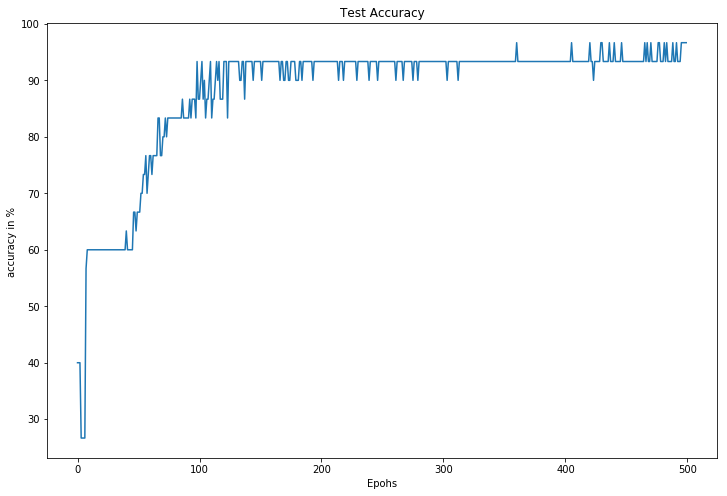

In [10]:
#plotting test accuracy


fig = plt.figure(figsize=(12, 8))
plt.plot([i for i in range(int(num_epochs))],testacc)
plt.title("Test Accuracy")
plt.xlabel("Epohs")
plt.ylabel("accuracy in % ")
plt.show()